# Exploratory analysis

1. This workbook covers some basic exploratory analyses to understand the data better
2. Both Review data and Product (meta data) have been analyzed here
3. Image data has not been analyzed

In [164]:
import pandas as pd
import gzip

# Reading the review
# def parse(path):
#     g = gzip.open(path, 'rb')
#     for l in g:
#         yield eval(l)

# def getDF(path):
#     i = 0
#     df = {}
#     for d in parse(path):
#         df[i] = d
#         i += 1
#     return pd.DataFrame.from_dict(df, orient='index')

In [165]:
%cd /Users/Deepthi/Documents/DSE/Capstone/Data/From Julius

/Users/Deepthi/Documents/DSE/Capstone/Data/From Julius


In [166]:
!ls

cleaned.hd5
cleaned.hd5.zip
image_features_Clothing_Shoes_and_Jewelry.b
meta_Clothing_Shoes_and_Jewelry.json.gz
ratings_Clothing_Shoes_and_Jewelry.csv
review_Women.csv
review_Women.csv.gz
review_women_brand_updated.csv
review_women_brnd_fv_prce_updated.csv
review_women_brnd_fv_updated.csv
review_women_brnd_fv_updated_2.csv
review_women_brnd_fv_updated_3.csv
reviews_Clothing_Shoes_and_Jewelry.json.gz
reviews_Clothing_Shoes_and_Jewelry_5.json.gz
reviews_Women_ALL_scraped.csv
reviews_Women_ALL_scraped.csv.gz
reviews_Women_scraped.csv.gz
reviews_Women_scraped_cpp.csv
reviews_Women_scraped_cpp.csv.gz
reviews_Women_scraped_cpp_fv_all.csv
reviews_Women_scraped_cpp_fv_all.csv.zip
tfidf_score.csv


In [167]:
## Women's metadata
df_meta = pd.read_hdf('cleaned.hd5', key='womens')

In [168]:
df_review = pd.read_csv('reviews_Women_ALL_scraped.csv')

In [17]:
df_meta.columns

Index([u'BRAND', u'FEATURE_BULLETS', u'NAME', u'ORIGINAL_PRICE',
       u'PRODUCT_DESCRIPTION', u'PRODUCT_INFORMATION', u'SALE_PRICE', u'URL',
       u'asin'],
      dtype='object')

In [18]:
df_review.columns

Index([u'reviewerId', u'asin', u'unixReviewTime', u'brand', u'price'], dtype='object')

In [23]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Analyze customers

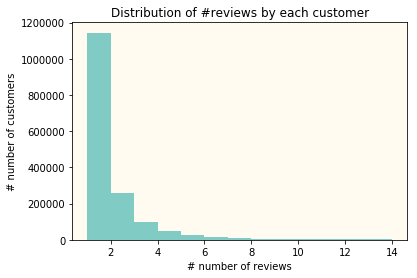

In [33]:
## Number of reviews by each customer
## This histogram shows that most customers write 5 reviews

# df_review.groupby(['reviewerID']).asin.nunique().reset_index()['asin'].hist(bins=range(5,25,1))

ax = df_review.groupby(['reviewerId']).asin.nunique().reset_index()['asin'].plot(kind = 'hist',bins =range(1,15,1),\
                                                                                 title = 'Distribution of #reviews by each customer'\
                                                                                ,facecolor='#80cbc4')
ax.set_xlabel('# number of reviews')
ax.set_ylabel('# number of customers')
ax.set_facecolor('#fffbf0')
plt.show()

In [32]:
df_review2 = df_review.groupby(['reviewerId']).asin.nunique().reset_index().groupby('asin').reviewerId.nunique().reset_index()

In [37]:
df_review2['pct_reviewers']=df_review2['reviewerId']*100/df_review2['reviewerId'].sum()

In [38]:
# Customers with 0-4 reviews form about 95% of the data. So 5 core happens to be 5% of the data.
df_review2

,asin,reviewerId,pct_reviewers
0,1,1143741,70.133609
1,2,257366,15.781551
2,3,98628,6.047818
3,4,47289,2.899737
4,5,26362,1.616504
5,6,16076,0.985772
6,7,10312,0.632327
7,8,7139,0.437760
8,9,5098,0.312607
9,10,3650,0.223816


In [41]:
## To plot the same distribution as %
df = df_review.groupby(['reviewerId']).asin.nunique().reset_index()
# df2= df.groupby(['asin']).count('asin').reset_index().sort('reviewerID',ascending = False)

df2= df.groupby(['asin']).reviewerId.nunique().reset_index().sort_values('reviewerId',ascending = False)

In [42]:
def flag(row):
        if row['asin'] == 1 :
            return '01'
        if row['asin'] == 2 :
            return '02'
        if row['asin'] == 3 :
            return '03'
        if row['asin'] == 4 :
            return '04'
        if row['asin'] == 5 :
            return '05'
        if row['asin'] == 6 :
            return '06'
        if row['asin'] == 7 :
            return '07'
        if row['asin'] == 8 :
            return '08'
        if row['asin'] == 9 :
            return '09'
        if row['asin'] == 10 :
            return '10'
        if row['asin'] > 10 :
            return '>10'

In [44]:
df2['flag']=df2.apply(lambda row: flag(row),axis=1)
df3 = df2.groupby(['flag']).reviewerId.sum().reset_index()

In [45]:
df3['pct'] = df3['reviewerId']/(df3['reviewerId'].sum())*100

/Users/Deepthi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/Deepthi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


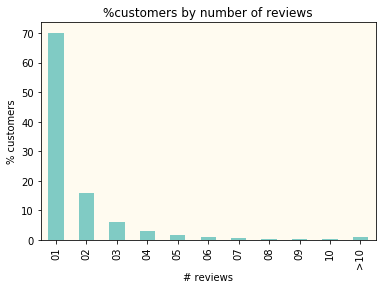

In [46]:
ax = df3.sort('flag',ascending=True).plot(kind='bar',x = 'flag',y='pct', color ='#80cbc4',\
                                     title='%customers by number of reviews'\
                                     ,legend = False)
ax.set_xlabel('# reviews')
ax.set_ylabel('% customers')
ax.set_axis_bgcolor('#fffbf0')
plt.show()

## This graph says that 40% of the customers write 5 reviews 
## 75% of the reviews are written by customers writing upto 7 reviews

### Helpful ratings

In [48]:
# helpful = df_review['helpful']

In [17]:
# yes=[]
# no=[]
# for i in range(len(df_review['helpful'])):
#     x = df_review['helpful'][i][0]
#     yes.append(x)
#     y = df_review['helpful'][i][1]
#     no.append(y)

In [18]:
# df_review['helpful_yes']=yes
# df_review['helpful_no']=no

In [19]:
# helpful_review = df_review[['overall','helpful_yes','helpful_no']].groupby('overall').sum().reset_index()

In [20]:
# helpful_review['yes_pct'] = helpful_review['helpful_yes']*100/(helpful_review['helpful_yes']+ helpful_review['helpful_no'])
# helpful_review['no_pct'] = helpful_review['helpful_no']*100/(helpful_review['helpful_yes']+ helpful_review['helpful_no'])

In [50]:
# helpful_review
## Higher tendency to click 'no' when not helpful than clicking 'yes' when helpful

In [49]:
# ax = helpful_review[['overall','yes_pct','no_pct']].plot(kind = 'bar', x = 'overall', title = 'Helpfulness Rating'\
#                                                         ,color =['#00695c','#af4345'])
                                                        


# ax.set_xlabel('Overall Ratings')
# ax.set_ylabel('% Helpful - Yes/No ')
# ax.set_axis_bgcolor('#fffbf0')
# ax.legend(('%Yes','%No'),loc=4)

### Overall Ratings

In [52]:
# overall_ratings = df_review[['reviewerId','asin','overall']].drop_duplicates().groupby(['overall']).reviewerId\
#                   .nunique().reset_index()

In [24]:
# total_cust_ratings = overall_ratings['reviewerID'].sum()

In [25]:
# overall_ratings['num_cust_ratings_pct'] = overall_ratings['reviewerID']*100/total_cust_ratings

In [26]:
# overall_ratings
# ## People tend to write a review only if they like the product
# ## I expected them to write a review if they hate it as well

,overall,reviewerID,num_cust_ratings_pct
0,1,8025,7.790808
1,2,11214,10.886744
2,3,19056,18.499893
3,4,26930,26.144108
4,5,37781,36.678446


In [53]:
# ax = overall_ratings.plot(kind = 'bar', x = 'overall',y='num_cust_ratings_pct', title = 'Overall Rating'\
#                                                         ,color =['#26a69a'], legend = False)
                                                        


# ax.set_xlabel('Overall Ratings')
# ax.set_ylabel('% customers ')
# ax.set_axis_bgcolor('#fffbf0')

### Reviews by time

In [28]:
# df_review.groupby(['reviewTime','overall']).reviewerID.count().reset_index().to_csv('time_plot.csv')

In [131]:
df_review['unixReviewTime2']=pd.to_datetime(df_review['unixReviewTime'],unit='s')

In [132]:
reviews_by_time = df_review.groupby(['unixReviewTime2']).reviewerId.count().reset_index()

In [134]:
reviews_by_time['year'] = pd.DatetimeIndex(reviews_by_time['unixReviewTime2']).year
reviews_by_time['month'] = pd.DatetimeIndex(reviews_by_time['unixReviewTime2']).month


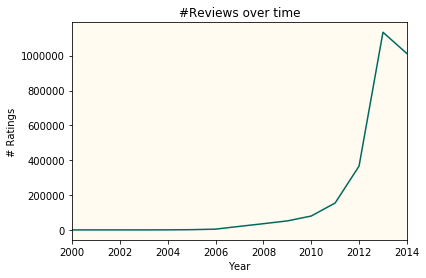

In [136]:
ax = reviews_by_time.groupby('year').reviewerId.sum().reset_index().plot(x='year',y='reviewerId', color='#00695c',\
                                                                         legend = False, title = '#Reviews over time')

ax.set_xlabel('Year')
ax.set_ylabel('# Ratings')
ax.set_facecolor('#fffbf0')

## Huge increase in reviews since 2011

In [138]:
reviews_by_time1= reviews_by_time[reviews_by_time['year']>2011]

/Users/Deepthi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


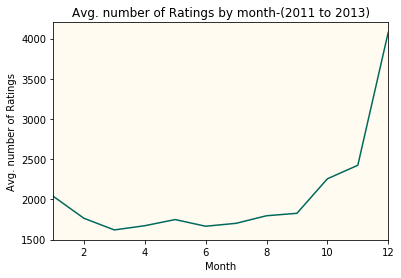

In [142]:
ax = reviews_by_time1[(reviews_by_time1['year']<>2014)].groupby(['month']).reviewerId.mean().reset_index().\
plot(x='month',y='reviewerId', legend = False, title = 'Avg. number of Ratings by month-(2011 to 2013)',color='#00695c')


ax.set_xlabel('Month')
ax.set_ylabel('Avg. number of Ratings')
ax.set_axis_bgcolor('#fffbf0')
## Highest number of reviews during holiday season

In [143]:
reviews_by_time.groupby(['year','month']).reviewerId.sum().reset_index()
# .to_csv('by_year.csv')
## Plotted this by year in excel - it seems like there is a trend in 2013 and 2014 where:
## 1. There is a small peak in Feb
## 2. Huge peak starting from september

,year,month,reviewerId
0,2000,11,1
1,2000,12,2
2,2001,8,1
3,2001,9,1
4,2002,3,2
5,2002,7,1
6,2002,10,1
7,2002,11,5
8,2002,12,2
9,2003,1,1


### Size of the reviews

In [145]:
# df_review['reviewText_len']=df_review['reviewText'].str.len()

In [146]:
# df_review['reviewText_len'].mean()

In [147]:
# ax = df_review['reviewText_len'].plot(kind = 'hist',bins=range(0,2000,100),\
#                          title = 'Distribution of the length of reviews'\
#                         ,facecolor='#80cbc4')


# ax.set_xlabel('Length of the Review')
# ax.set_ylabel('# of reviews')
# ax.set_axis_bgcolor('#fffbf0')

In [148]:
# df_review.groupby(['reviewText_len','overall']).reviewerID.count().reset_index().to_csv('review_length.csv')

# ## Nothing important

In [149]:
# df_review.groupby(['reviewText_len','helpful_yes']).reviewerID.count().reset_index().to_csv('review_length_yes.csv')

### Analyze products

In [151]:
# # df_review.groupby('asin').overall.mean().round().reset_index()['overall'].hist()
# ax = df_review.groupby('asin').overall.mean().round().reset_index()['overall']\
#                               .plot(kind = 'hist',\
#                                title = '# of products by average product reviews'\
#                                ,facecolor='#80cbc4')
    
    
# ax.set_xlabel('# of products')
# ax.set_ylabel('Average Reviews')
# ax.set_axis_bgcolor('#fffbf0')
# ## Most products have an average rating of 4 - very skewed??

In [152]:
df_meta['asin'].nunique()

12725

In [153]:
df_meta.count()

BRAND                  12609
FEATURE_BULLETS        12725
NAME                   12716
ORIGINAL_PRICE          7807
PRODUCT_DESCRIPTION    12725
PRODUCT_INFORMATION    12725
SALE_PRICE              7807
URL                    12725
asin                   12725
dtype: int64

In [181]:
df_meta['ORIGINAL_PRICE'].replace('None', '0', inplace=True)

In [187]:
df_meta['ORIGINAL_PRICE']=df_meta['ORIGINAL_PRICE'].fillna('$0')
df_meta['SALE_PRICE']=df_meta['SALE_PRICE'].fillna('$0')

In [188]:
# df_meta.ORIGINAL_PRICE.replace(to_replace=dict('None'=0), inplace=True)

# df_meta['ORIGINAL_PRICE'].replace('None', 0,inplace=False)

In [189]:
import re
def is_number(s):
    try:
        complex(s) # for int, long, float and complex
    except ValueError:
        return False
    return True

getMoney = lambda text : [ ''.join(x[0]) for x in re.findall(r'(\$?\d+([,\.]\d+)?k?)', text.replace(',', '').replace('$',''))]

def getAvg(x):
    s = average([(float(y) if is_number(y) else -1) for y in getMoney(x.SALE_PRICE)])
    o = average([(float(y) if is_number(y) else -1) for y in getMoney(x.ORIGINAL_PRICE)])
    return average([s, o])

In [192]:
df_meta['price2']=df_meta.apply(lambda x: getAvg(x), axis='columns')

In [193]:
# df_meta['ORIGINAL_PRICE']

In [194]:
# df_meta['price2'] = df_meta[u'SALE_PRICE'].round()



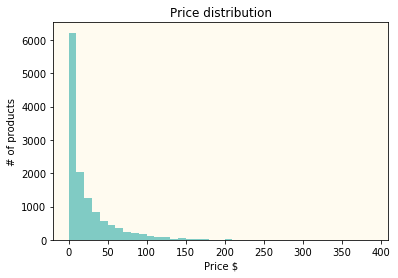

In [209]:
# df_meta.groupby('price2').asin.count().reset_index()['asin'].hist(bins=range(0,5000,1))

# df_meta['price2'].hist(bins=range(0,400,10))


ax = df_meta['price2']\
      .plot(kind = 'hist',bins=range(0,400,10),\
       title = 'Price distribution'\
       ,facecolor='#80cbc4')
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_facecolor('#fffbf0')


plt.show()

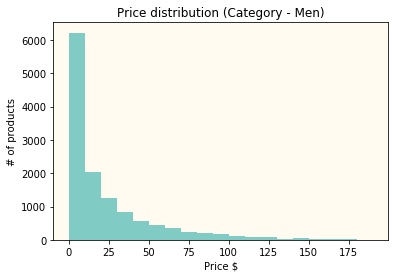

In [207]:
# df_meta[df_meta['category_flag']== 'Men'][['price2']].hist(bins = range(0,200,10))


ax = df_meta[['price2']]\
      .plot(kind = 'hist',bins=range(0,200,10),\
       title = 'Price distribution (Category - Men)'\
       ,facecolor='#80cbc4', legend = False)
    
    
ax.set_xlabel('Price $')
ax.set_ylabel('# of products')
ax.set_facecolor('#fffbf0')


plt.show()